# Modelo de reconocimiento de letras

Por medio del uso del dataset que se encuentra en [keggle](https://www.kaggle.com/datasets/landlord/handwriting-recognition?resource=download), se desea construir un modelo de inteligencia artificial que proporcione la capacidad de analizar entrada de escritura a mano por medio de una entrada por mouse (Para esto se usará tensorflow.js que permite exportar el modelo para usarlo en el navegador de forma sencilla).

## Entrenamiento de dígitos

Para poder entrenar el modelo en el reconocimiento de letras individuales se usará la base de datos [EMNIST](https://www.kaggle.com/datasets/crawford/emnist?resource=download) lo cual nos ayudará a posteriormente entrenar el model en identificar las letras de cada uno de las palabras.

In [70]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import math

DATASET_JONAS = "dataset/archive"

In [61]:
# Modelo
m = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(125, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(27, activation='softmax')])

m.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

/home/jonasaray/Documents/UCAB/Decimo/Inteligencia artificial/Proyecto/LetterRecognition/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
df_train = pd.read_csv(os.path.join(DATASET_JONAS, "emnist-letters-train.csv"), header=None)
df_train = df_train.sample(frac=1)
df_train_label = df_train.pop(0)
num_train = df_train.__len__()
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
5086,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56849,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60735,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52265,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86899,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61017,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30092,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41542,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77764,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_test = pd.read_csv(os.path.join(DATASET_JONAS, "emnist-letters-test.csv"), header=None)
df_test = df_test.sample(frac=1)
df_test_label = df_test.pop(0)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
historial = m.fit(df_train, df_train_label, epochs=10, validation_data=[df_test, df_test_label])

Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3867 - sparse_categorical_accuracy: 0.8836 - val_loss: 0.5979 - val_sparse_categorical_accuracy: 0.8420
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8817 - val_loss: 0.6113 - val_sparse_categorical_accuracy: 0.8418
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3723 - sparse_categorical_accuracy: 0.8876 - val_loss: 0.6407 - val_sparse_categorical_accuracy: 0.8293
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.5935 - val_sparse_categorical_accuracy: 0.8449
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3686 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.6116 - val_sparse_categorical_accuracy: 0.8433
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.5734 - val_sparse_categorical_accuracy:

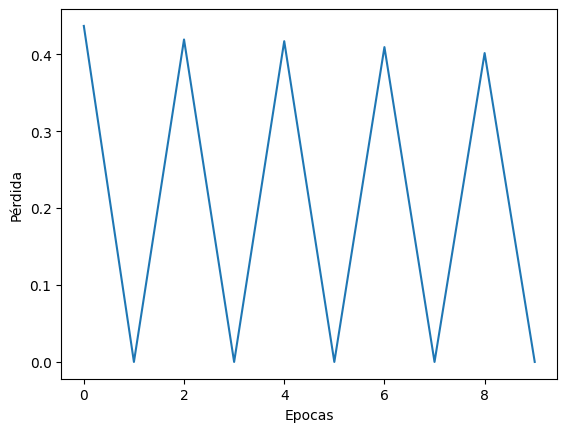

In [72]:
plt.xlabel("Epocas")
plt.ylabel("Pérdida")
plt.plot(historial.history['loss'])